<a href="https://colab.research.google.com/github/veropetit/PHYS633-S2022/blob/main/L09-Absorption/09-Absorption-template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="purple">09-Absorption</font> (template)

We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Matplotlin patches -- module that enables patches in plots
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable()

## 0. To execute: Below is a little function that created a gradiant of color between two curves, according to a certain function.

In [2]:
def rect(ax,x,y,w,h,c):
    #ax = plt.gca()
    polygon = plt.Rectangle((x,y),w,h,color=c)
    ax.add_patch(polygon)

def rainbow_fill_between(ax, X, Y1, Y2, colors=None, 
                         cmap=plt.get_cmap("Reds"),**kwargs):
    plt.plot(X,Y1,lw=0)  # Plot so the axes scale correctly

    dx = X[1]-X[0]
    N  = X.size

    #Pad a float or int to same size as x
    if (type(Y2) is float or type(Y2) is int):
        Y2 = np.array([Y2]*N)

    #No colors -- specify linear
    if colors is None:
        colors = []
        for n in range(N):
            colors.append(cmap(n/float(N)))
    #Varying only in x
    elif len(colors.shape) == 1:
        colors = cmap((colors-colors.min())
                      /(colors.max()-colors.min()))
    #Varying only in x and y
    else:
        cnp = np.array(colors)
        colors = np.empty([colors.shape[0],colors.shape[1],4])
        for i in range(colors.shape[0]):
            for j in range(colors.shape[1]):
                colors[i,j,:] = cmap((cnp[i,j]-cnp[:,:].min())
                                    /(cnp[:,:].max()-cnp[:,:].min()))

    colors = np.array(colors)

    #Create the patch objects
    for (color,x,y1,y2) in zip(colors,X,Y1,Y2):
        rect(ax,x,y2,dx,y1-y2,color,**kwargs)

## 1. In class: Imagine an ray of light entering a slab of constant density and opacity. 

* The lenght of the slab ($d$) is 4 length units. 
* The product of the opacity and the density give a fraction of $\kappa\rho$ = 0.25 per unit of length. 

### a. Find and plot the intensity as the ray crosses the slab.

> **TODO** <font color='red'>: Starting from the $dI_\lambda$ equation, derive the equation for $I(s)$ for a constant density and opacity. Show your work here. Add a curve of $I(s)$ to the plot in the code below.</font>

$dI_\lambda = -\rho \kappa_\lambda I_\lambda ds$

$\int_{I_0}^I \frac{dI_\lambda}{I} = \int_{s_0}^{s} -\rho \kappa_\lambda ds$

$ln(I)-ln(I_0) = \int_{s_0}^{s} -\rho \kappa_\lambda ds$

$I = I_0 e^{\int_{s_0}^{s} -\rho \kappa_\lambda ds}$

$I = I_0 e^{-\rho \kappa_\lambda(s-s_0)}$

### b. Find and plot the optical depth everywhere in the slab.

> **TODO** <font color='red'>: Integrate the equation for $d\tau$ to find $\tau(s)$. Show your work here. Add a curve of $\tau(s)$ to the plot in the code below.  </font>

$d\tau_\lambda = - \kappa_\lambda \rho ds$

$\int_{\tau_{obs}}^{\tau} d\tau_\lambda = -\int_{s_{obs}}^{s} \kappa_\lambda \rho ds$

$\tau_\lambda = -\int_{s_{obs}}^{s} \kappa_\lambda \rho ds$

$\tau_\lambda = -\kappa_\lambda \rho (s-s_{obs})$

<br>
<br>
<font color="red">Don't forget to add axis labels and legends to your plots</font>

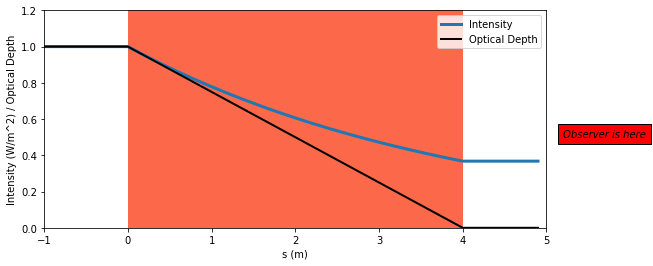

In [3]:
fig, ax = plt.subplots(1,1, figsize=(9,4))
ax.set_ylim(0, 1.2)
ax.set_xlim(-1,5)

# For the first graph, I want a patch with constant color
cmap = plt.cm.get_cmap('Reds') # get a red scale color map
rgba = cmap(0.5) # pick the color in the center of the color map
rec = mpatches.Rectangle( (0, 0), 4 , 1.2, fc=rgba) # Create a shaded rectangle
ax.add_patch(rec) # add the rectangle to the plot
ax.text(5.2, 0.5, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})
plt.xlabel("s (m)")
plt.ylabel("Intensity (W/m^2) / Optical Depth")


#---------------------------------------
# a. Intensity
Io = 1.0
kappa_rho = 0.25
ss = np.arange(-1,5,0.1)
I = Io * np.exp(-1*kappa_rho*ss)

n = np.where(ss < 0)
I[n[0]] = Io
n = np.where(ss > 3.9)
I[n[0]] = I[n[0][0]]


ax.plot(ss,I,lw=3,label='Intensity')

#---------------------------------------
# b. optical depth

tao = -1 * kappa_rho * (ss - 4)

n = np.where(ss < 0)
tao[n[0]] = tao[n[0][-1]]
n = np.where(3.9 < ss)
tao[n[0]] = tao[n[0][0]]

ax.plot(ss,tao,lw=2,color="black",label='Optical Depth')


#--------------------------
# For a legend, add label='text' to the ax.plot command
# for which you would like a legend entry, and uncomment
# the following line:
ax.legend(loc=0)

## 2. At home: Imagine now that the density in the slab changes such that:

$$ \rho(s) = \rho_o \left( 1- \frac{s}{d} \right), $$ where $d$ is the length of the slab.

> **TODO**:
>
> a. Find an expression for $I(s)$ is the density changed as above and if the opacity remains constant. Make your integral unit-less before integrating. Show your work here. 

$I = I_0 e^{\int_{s_0}^{s} -\rho \kappa_\lambda ds}$

$I = I_0 e^{\int_{s_0}^{s} -\kappa_\lambda \rho_0 (1-\frac{s}{d})ds}$

$I = I_0 e^{-\kappa_\lambda \rho_0 (s - s_0 - \frac{s^2}{2d} + \frac{s_0^2}{2d})}$

> b. Analytically, find what the value of $\rho_o \kappa$ has to be for the final intensity to be the same as that of #1. Show your work here

$I_c = I_0 e^{-\rho \kappa_\lambda(s-s_0)}$

$I_l = I_0 e^{-\kappa_\lambda \rho_0 (s - s_0 - \frac{s^2}{2d} + \frac{s_0^2}{2d})}$

$I_c(d) = I_l(d)$

$I_0 e^{-\rho \kappa_\lambda(d-s_0)} = I_0 e^{-\kappa_\lambda \rho_0 (s - s_0 - \frac{d^2}{2d} + \frac{d_0^2}{2d})}$

$2 \rho \kappa = \rho_0 \kappa_0$

> c. In the graph below, plot the intensity as a function of position. 

> d. Find an expression for the optical depth everywhere in the slab. Make your integral unit-less before integrating. Show your work here. 

$\tau_\lambda = -\int_{s_{obs}}^{s} \kappa_\lambda \rho ds$

$\tau_\lambda = -\kappa_\lambda \rho_0  (s-s_{obs}+\frac{s^2}{2d}-\frac{s_{obs}^2}{2d})$

> e. In the graph below, add a curve for $\tau(s)$.

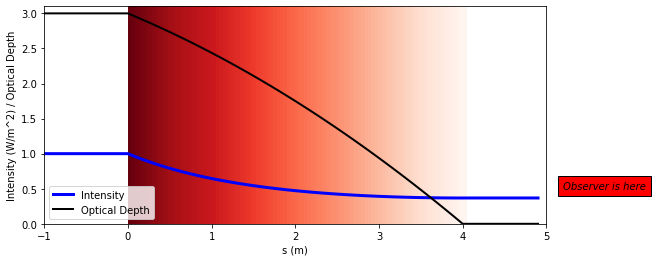

In [4]:
fig, ax = plt.subplots(1,1, figsize=(9,4))

ax.set_ylim(0, 3.1)
ax.set_xlim(-1,5)

# Create a patch with a gradient to illustrate
# the change in density
X=np.linspace(0,4,100)
Y1=np.copy(X)*0
Y2=np.copy(X)*0+4
g = 1.0-np.copy(X/4)
rainbow_fill_between(ax,X,Y1,Y2,colors=g)
ax.text(5.2, 0.5, 'Observer is here', style='italic',
        bbox={'facecolor':'red', 'pad':5})

plt.xlabel("s (m)")
plt.ylabel("Intensity (W/m^2) / Optical Depth")

#---------------------------------------
#---------------------------------------
# At home
Io = 1.0
kappa_rho = 0.5
d = 4
ss = np.arange(-1,5,0.1)
I = Io * np.exp(-1*(kappa_rho)*(ss-(ss**2)/(2*d)))

n = np.where(ss < 0)
I[n[0]] = Io
n = np.where(ss > 4)
I[n[0]] = I[n[0][0]]

ax.plot(ss,I,lw=3,color="blue",label='Intensity')

tao = -1 * kappa_rho * (ss - d + (ss**2)/(2*d) - (d**2)/(2*d))

n = np.where(ss < 0)
tao[n[0]] = tao[n[0][-1]]
n = np.where(3.9 < ss)
tao[n[0]] = tao[n[0][0]]

ax.plot(ss,tao,lw=2,color="black",label='Optical Depth')



#--------------------------
ax.legend(loc=0)

## 3. Reading assignement: "what can we measure about stars" -- part 4

In this graduate course, we are making an advanced physical and mathematical model of star. 

But it is still good to learn and/or remind ourselves about which physical characteristics of stars we can actually measure. You might have covered some of this in some details in previous physics or astro courses (at UD PHYS 133, 144, 333, or 469) -- but it is still a good idea to have a quick look at the suggested reading below before crafting your paragraph. 

One other thing that can be measured is the **mass** of a star.

> **TODO**: <font color='red'>Have a look at section 18.2 Measuring Stellar Masses of the Open Stack Astronomy online [textbook](https://openstax.org/books/astronomy/pages/5-2-the-electromagnetic-spectrum), and write a short conceptual paragraph about how astronomer can determine the masses of stars. </font>